In [97]:
%load_ext autoreload
%autoreload 2

from openweights import OpenWeights
from openweights.utils import flatten, compare
from dotenv import load_dotenv

load_dotenv()
client = OpenWeights()    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Find jobs with given parameters

In [98]:
jobs = client.jobs.find(meta={'group': 'hparams'}, load_in_4bit='false')
df = pd.DataFrame([flatten(job) for job in jobs])
df

,id,created_at,type,model,params.r,params.beta,params.loss,params.meta.group,params.meta.sweep_group,params.seed,...,outputs.eval_log_odds_chosen,outputs.eval_logits/rejected,outputs.eval_rewards/margins,outputs.eval_rewards/rejected,outputs.eval_steps_per_second,outputs.gpu_memory_reserved_mb,outputs.eval_rewards/accuracies,outputs.eval_samples_per_second,outputs.gpu_memory_allocated_mb,outputs
0,ftjob-b78e0197e550,2024-11-19T15:07:22.726086+00:00,fine-tuning,unsloth/llama-3-8b,32,0.1,orpo,hparams,green-watermelon-275,420,...,2.470920,-1.224462,0.233119,-0.338736,2.424,20700.0,0.528846,19.392,15995.309570,NaN
1,ftjob-31f8b9c5fadb,2024-11-19T15:07:28.69811+00:00,fine-tuning,unsloth/Mistral-Small-Instruct-2409,32,0.1,orpo,hparams,green-watermelon-275,420,...,0.967876,-1.827261,0.077481,-0.152227,0.914,46592.0,0.540064,7.315,44492.294434,NaN
2,ftjob-5db42fe14267,2024-11-19T15:07:40.661501+00:00,fine-tuning,unsloth/llama-3-8b,32,0.1,orpo,hparams,green-watermelon-275,420,...,3.597633,-1.081681,0.348112,-0.467654,2.374,20700.0,0.532051,18.995,15995.309570,NaN
3,ftjob-30d905aa7e3d,2024-11-19T15:07:35.84795+00:00,fine-tuning,unsloth/llama-3-8b,32,0.1,orpo,hparams,green-watermelon-275,420,...,0.389528,-1.080915,0.033238,-0.139710,2.421,20700.0,0.528846,19.365,15995.342773,NaN
4,ftjob-0f7cfa6a0aaa,2024-11-19T15:07:29.620556+00:00,fine-tuning,unsloth/Qwen2.5-32B-Instruct,32,0.1,orpo,hparams,green-watermelon-275,420,...,0.570986,-0.067326,0.049278,-0.138902,0.381,71298.0,0.540064,3.045,65092.922852,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,ftjob-17a1bef22a2f,2024-11-19T15:08:29.034956+00:00,fine-tuning,unsloth/Qwen2.5-32B-Instruct,32,0.1,orpo,hparams,green-watermelon-275,420,...,0.259361,-1.886896,0.025914,-0.791075,0.403,71298.0,0.589744,3.228,65092.922852,NaN
198,ftjob-1e7e2e49201a,2024-11-19T15:08:39.848908+00:00,fine-tuning,unsloth/llama-3-8b,32,0.1,orpo,hparams,green-watermelon-275,420,...,0.413602,-1.347129,0.041335,-0.817494,2.391,20700.0,0.665064,19.131,15995.309570,NaN
199,ftjob-80ea2fde1e59,2024-11-19T15:08:37.625782+00:00,fine-tuning,unsloth/Qwen2.5-32B-Instruct,32,0.1,orpo,hparams,green-watermelon-275,420,...,0.259977,-1.837718,0.025977,-0.794391,0.614,71398.0,0.589744,4.909,65140.672852,NaN
200,ftjob-73be1ba39812,2024-11-19T15:08:33.298295+00:00,fine-tuning,unsloth/Qwen2.5-32B-Instruct,32,0.1,orpo,hparams,green-watermelon-275,420,...,0.273398,-1.823588,0.027309,-0.768681,0.662,71440.0,0.592949,5.298,65140.645020,NaN


# Visualize effect of learning rate on test loss for fixed other params


Grouping by: ['params.r', 'params.lora_alpha']


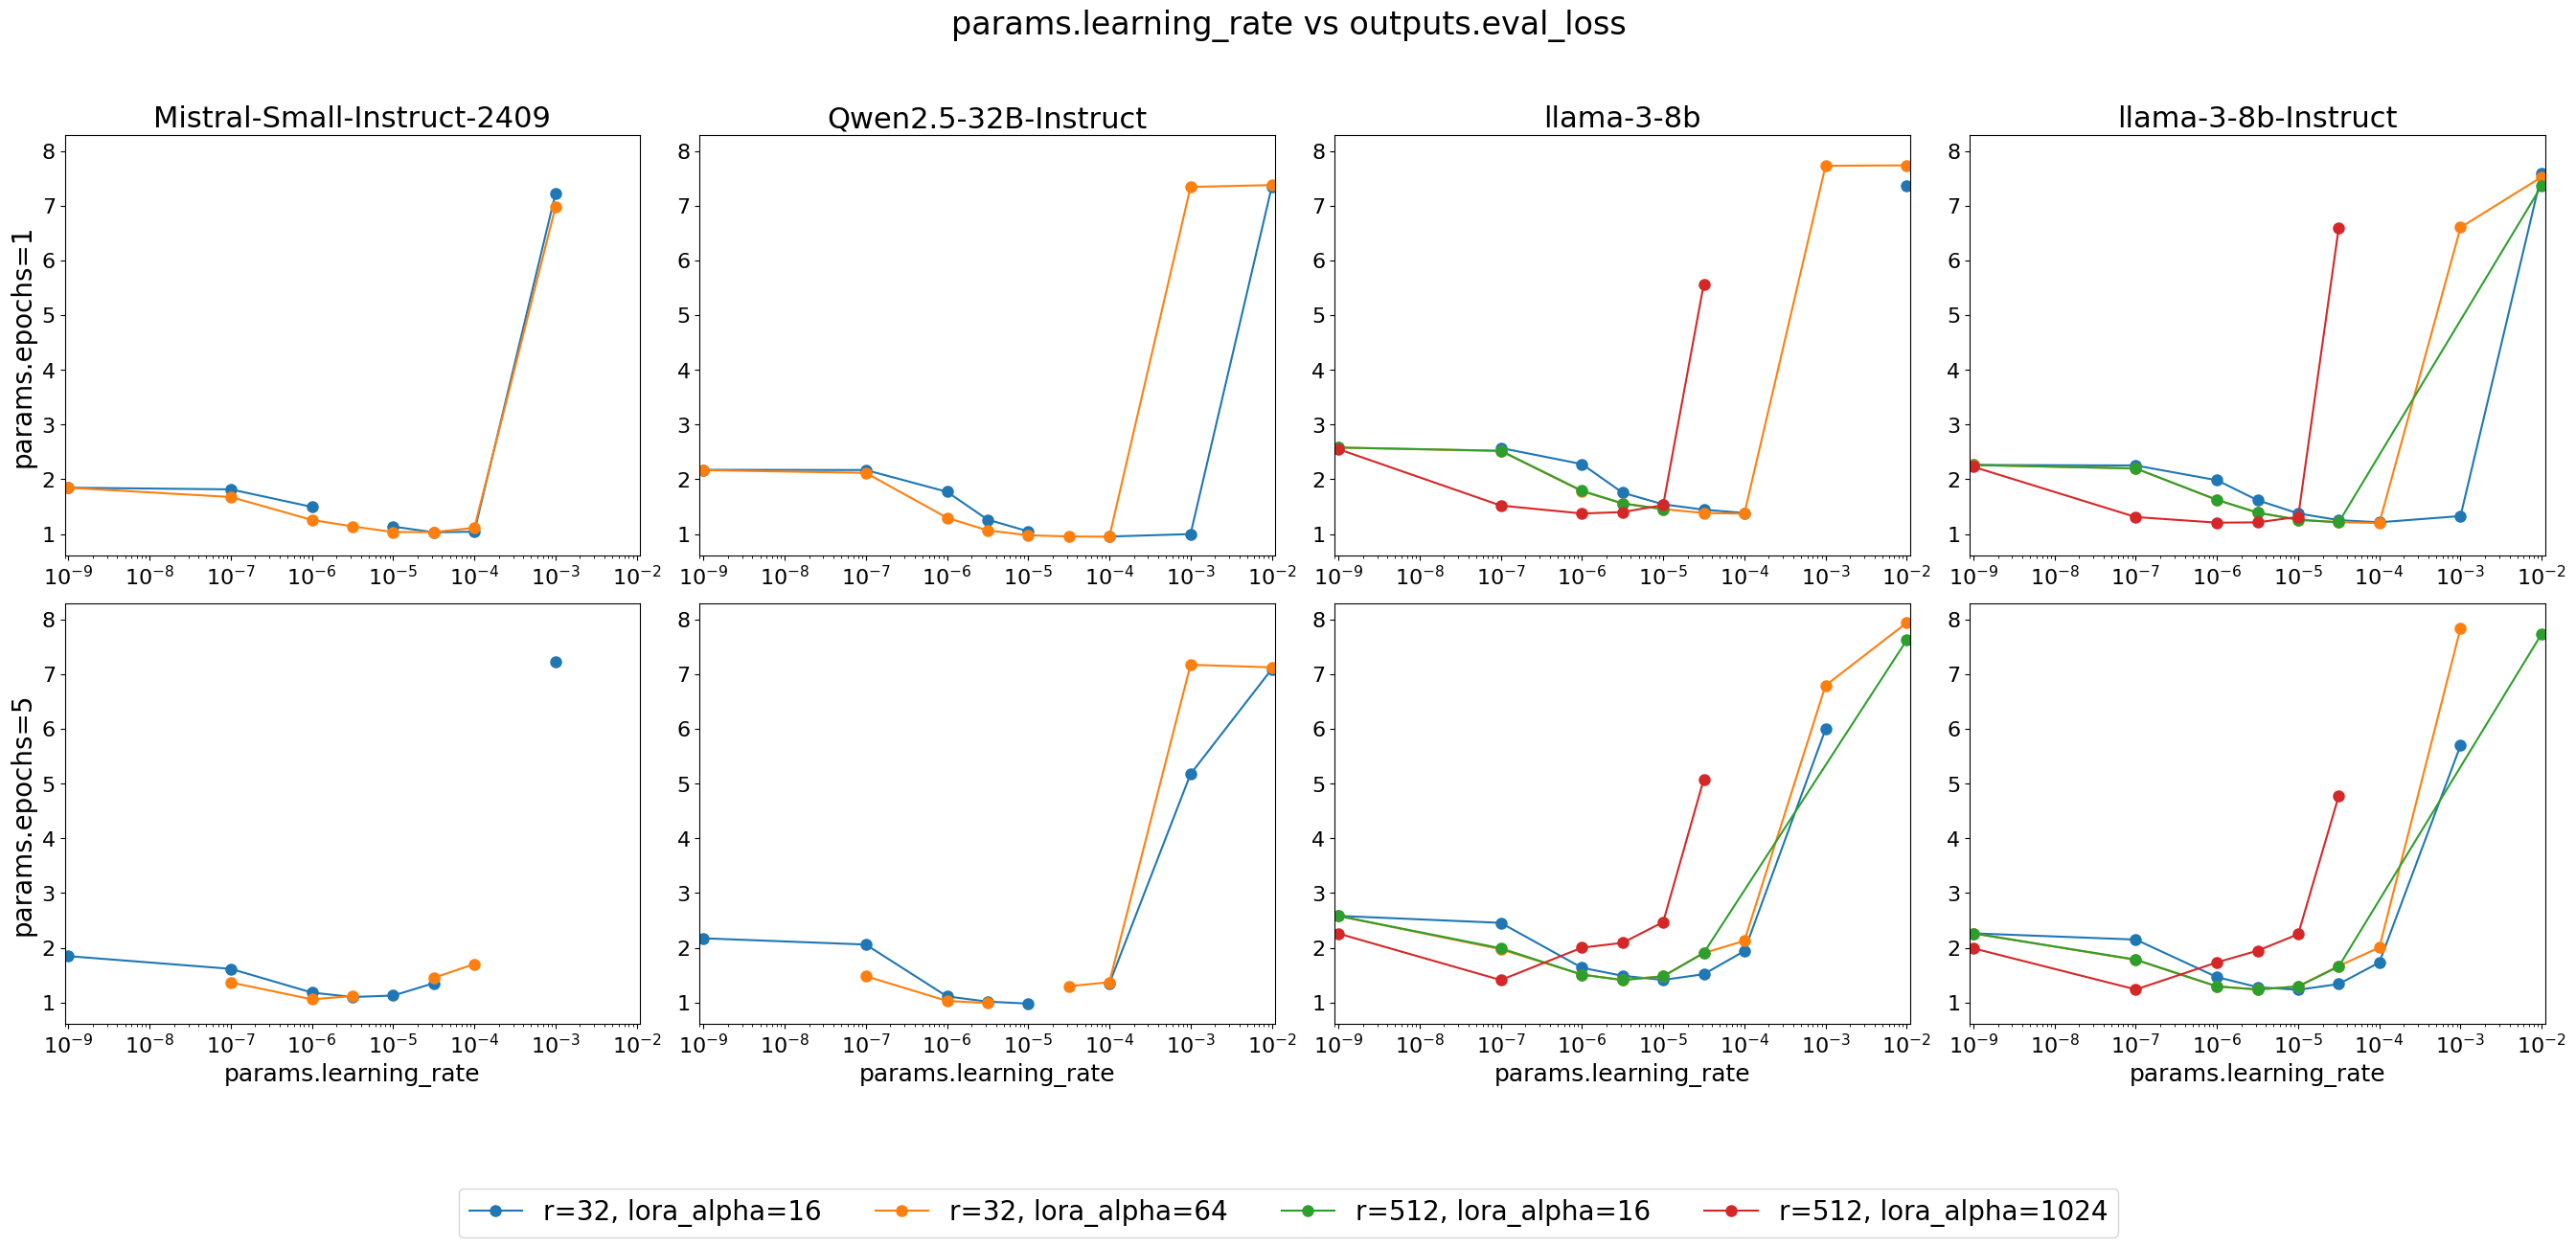

In [99]:
df['params.model'] = df['params.model'].apply(lambda i: i.split('/')[-1])
fig = compare(df, x='params.learning_rate', y='outputs.eval_loss', groupby='params.*', subplot_rows='params.epochs', subplot_cols='params.model')
plt.show()

# Get latest test loss for a job

In [68]:
metrics = client.events.latest(['eval_loss'], job_id=job['id'])
metrics

{'eval_loss': 2.2290914058685303}

# Plot training events of a job or run

<Axes: xlabel='step'>

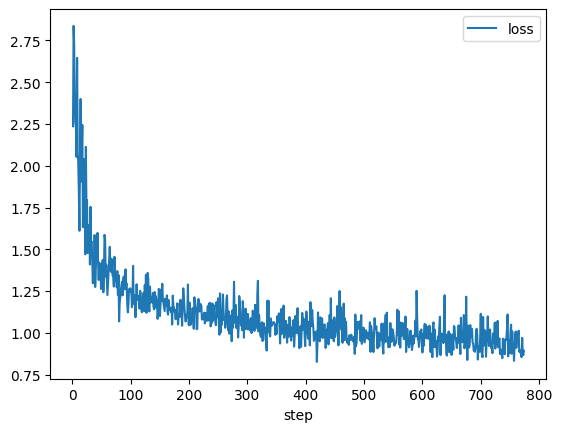

In [95]:
from pandas.api.types import is_numeric_dtype

client = OpenWeights()
job = [job for job in jobs if job['status']=='completed'][0]

df_events = pd.DataFrame([event['data'] for event in client.events.list(job_id=job['id'])])
df_events.dropna(subset=['step', 'loss']).plot(x='step', y='loss')